In [2]:
import pandas as pd
data =pd.read_excel("C:\\Users\\周恒\\Desktop\\2022年“华数杯”全国大学生数学建模竞赛赛题\\2022年“华数杯”全国大学生数学建模竞赛C题\\C题数据.xlsx",sheet_name=0)
data.head()

,组号,编号,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,插层率（%）
0,1.0,1#,1.715,93.52,77.84,8.130,4.967,777.10,NaN
1,NaN,2#,2.810,96.28,83.20,7.533,19.967,1019.67,36.44
2,2.0,1#,1.830,93.93,86.23,10.470,1.933,795.57,NaN
3,NaN,2#,2.910,96.41,86.65,7.200,24.967,968.63,24.74
4,3.0,1#,1.890,94.12,82.12,11.870,4.300,564.93,NaN


In [3]:
data.describe()

,组号,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,插层率（%）
count,25.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,25.000000
mean,13.000000,2.063100,94.105200,83.032200,26.970860,42.189360,384.869200,23.035600
std,7.359801,0.722226,2.387573,8.085928,15.743696,23.166188,215.611906,11.568623
min,1.000000,0.870000,87.230000,43.910000,7.200000,1.733000,137.170000,2.500000
25%,7.000000,1.542500,92.887500,80.700000,14.592750,23.366500,234.265000,16.530000
50%,13.000000,1.992500,94.530000,83.575000,22.601500,42.033000,317.480000,21.710000
75%,19.000000,2.675000,96.170000,87.475000,33.925000,60.141500,477.520000,31.190000
max,25.000000,3.845000,97.300000,94.590000,65.770000,86.967000,1019.670000,50.870000


In [21]:
data1=data.iloc[:,2:].fillna(0)
res = pd.DataFrame(data1.values[1::2] - data1.values[::2],
                   columns=["厚度","孔隙率","压缩回弹性率","过滤阻力","过滤效率","透气性"]) 
res

ValueError: Shape of passed values is (25, 7), indices imply (25, 6)

In [20]:
corr = res.corr()
corr

,厚度,孔隙率,压缩回弹性率,过滤阻力,过滤效率,透气性,插层率
厚度,1.000000,0.238566,-0.112121,-0.139949,0.315748,0.255066,0.053000
孔隙率,0.238566,1.000000,0.358408,-0.269436,-0.296446,0.014107,-0.215797
压缩回弹性率,-0.112121,0.358408,1.000000,-0.170314,-0.303585,0.108178,-0.359890
过滤阻力,-0.139949,-0.269436,-0.170314,1.000000,0.654548,0.354856,0.125840
过滤效率,0.315748,-0.296446,-0.303585,0.654548,1.000000,0.310246,0.010421
透气性,0.255066,0.014107,0.108178,0.354856,0.310246,1.000000,-0.027119
插层率,0.053000,-0.215797,-0.359890,0.125840,0.010421,-0.027119,1.000000


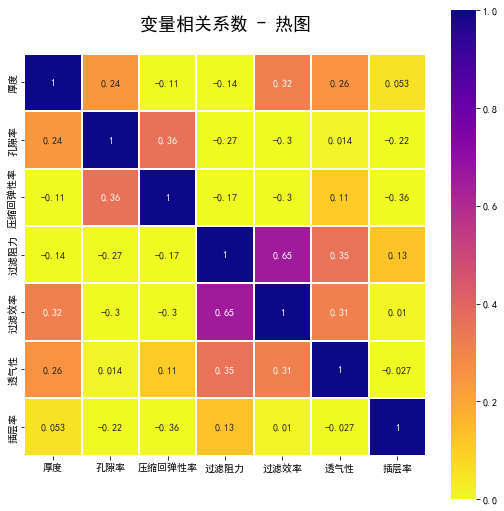

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(9, 9)) # 设置画面大小
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题,负号正常显示
plt.title('变量相关系数 - 热图\n', fontsize=18) # 添加图表标题“变量相关系数 - 热图”,fontsize=18 字体大小 可省略
# annot=True，是显式热力图上的数值；vmax是显示最大值;xticklabels、yticklabels轴标签显示；square=True，将图变成一个正方形，默认是一个矩形；cmap="Blues"是一种模式，就是图颜色配置。
# mask:控制某个矩阵块是否显示出来,默认值是None,如果是布尔型的DataFrame，则将DataFrame里True的位置用白色覆盖掉
plt.title('变量相关系数 - 热图\n', fontsize=18)



sns.heatmap(corr, annot=True, vmax=1, vmin=0, xticklabels=True, yticklabels=True, square=True, cmap="plasma_r",
linewidths=0.05, linecolor='white') # mask=t < 0.8等价于mask=(t < 0.8)
#plt.show()

fig=plt.gcf()

fig.savefig('./666.png')